In [41]:
# Load Libraries:- 

In [42]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statistics as s

In [43]:
df = pd.read_csv('employee_data.csv')
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [44]:
df.shape,df.size

((400, 5), 2000)

In [103]:
df.groupby('Gender').size()

Gender
F    198
M    202
dtype: int64

In [102]:
df.groupby('Position').size()

Position
Cloud Solutions Architect       30
Database Administrator (DBA)    38
DevOps Engineer                 37
IT Manager                      40
IT Security Analyst             39
IT Support Specialist           31
Network Administrator           31
Software Engineer               36
Systems Administrator           38
Systems Analyst                 37
Web Developer                   43
dtype: int64

In [45]:
df.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [46]:
df.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [47]:
df['Gender'].value_counts()

Gender
M    202
F    198
Name: count, dtype: int64

[Text(0, 0, '198'), Text(0, 0, '202')]


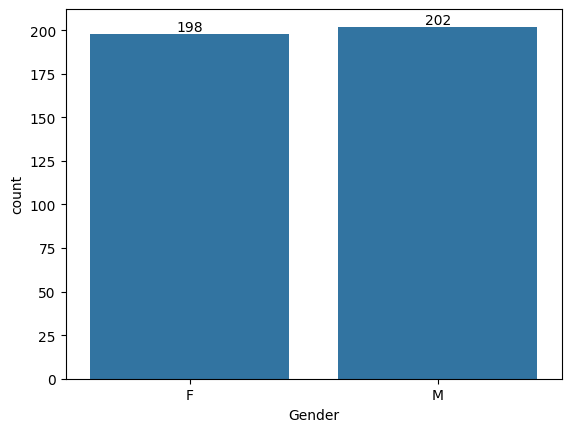

In [48]:
data = sns.countplot(x=df['Gender'])

for i in data.containers:
    print(data.bar_label(i))


In [49]:
df.rename(columns={'Experience (Years)':'experience_year'},inplace=True)


In [50]:
df['experience_year'].value_counts()

experience_year
3     26
2     24
1     24
11    22
19    22
10    22
13    21
16    21
14    20
9     19
12    18
6     18
4     18
7     17
17    17
5     17
0     17
20    16
18    15
15    13
8     13
Name: count, dtype: int64

[Text(0, 0, '9'), Text(0, 0, '14'), Text(0, 0, '9'), Text(0, 0, '12'), Text(0, 0, '9'), Text(0, 0, '7'), Text(0, 0, '9'), Text(0, 0, '10'), Text(0, 0, '4'), Text(0, 0, '10'), Text(0, 0, '13'), Text(0, 0, '9'), Text(0, 0, '12'), Text(0, 0, '9'), Text(0, 0, '11'), Text(0, 0, '5'), Text(0, 0, '10'), Text(0, 0, '6'), Text(0, 0, '9'), Text(0, 0, '14'), Text(0, 0, '7')]
[Text(0, 0, '8'), Text(0, 0, '10'), Text(0, 0, '15'), Text(0, 0, '14'), Text(0, 0, '9'), Text(0, 0, '10'), Text(0, 0, '9'), Text(0, 0, '7'), Text(0, 0, '9'), Text(0, 0, '9'), Text(0, 0, '9'), Text(0, 0, '13'), Text(0, 0, '6'), Text(0, 0, '12'), Text(0, 0, '9'), Text(0, 0, '8'), Text(0, 0, '11'), Text(0, 0, '11'), Text(0, 0, '6'), Text(0, 0, '8'), Text(0, 0, '9')]


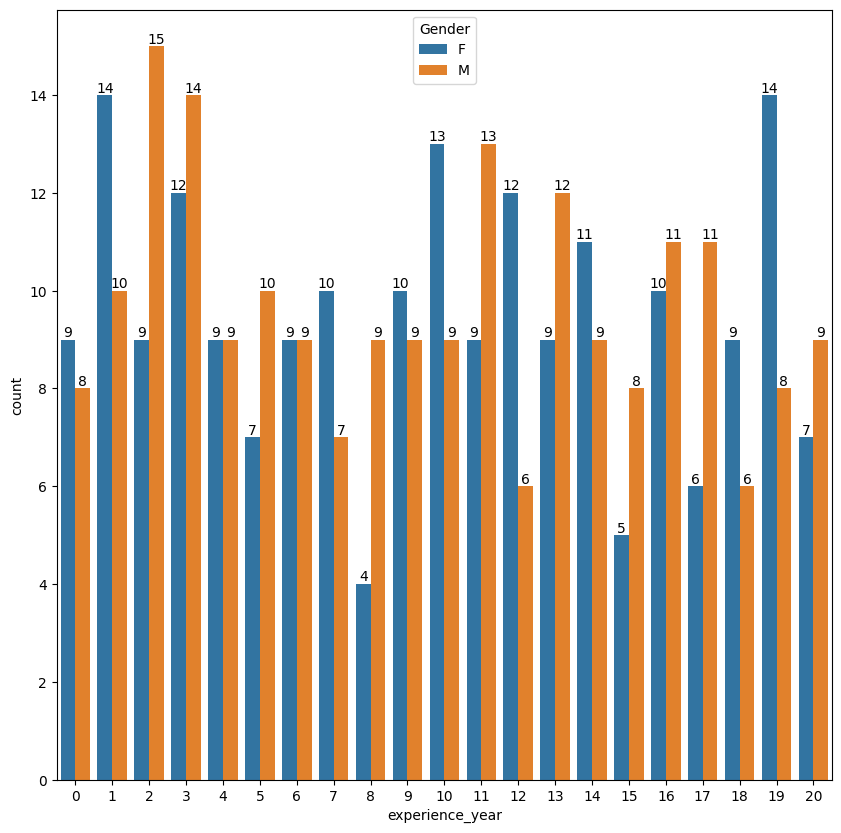

In [51]:
plt.figure(figsize=(10,10))
data = sns.countplot(x=df['experience_year'],hue=df['Gender'])

for i in data.containers:
    print(data.bar_label(i))

In [52]:
df['Position'].value_counts()

Position
Web Developer                   43
IT Manager                      40
IT Security Analyst             39
Database Administrator (DBA)    38
Systems Administrator           38
DevOps Engineer                 37
Systems Analyst                 37
Software Engineer               36
Network Administrator           31
IT Support Specialist           31
Cloud Solutions Architect       30
Name: count, dtype: int64

[Text(0, 0, '17'), Text(0, 0, '22'), Text(0, 0, '18'), Text(0, 0, '20'), Text(0, 0, '14'), Text(0, 0, '16'), Text(0, 0, '17'), Text(0, 0, '18'), Text(0, 0, '17'), Text(0, 0, '22'), Text(0, 0, '17')]
[Text(0, 0, '20'), Text(0, 0, '21'), Text(0, 0, '20'), Text(0, 0, '20'), Text(0, 0, '17'), Text(0, 0, '22'), Text(0, 0, '22'), Text(0, 0, '18'), Text(0, 0, '14'), Text(0, 0, '15'), Text(0, 0, '13')]


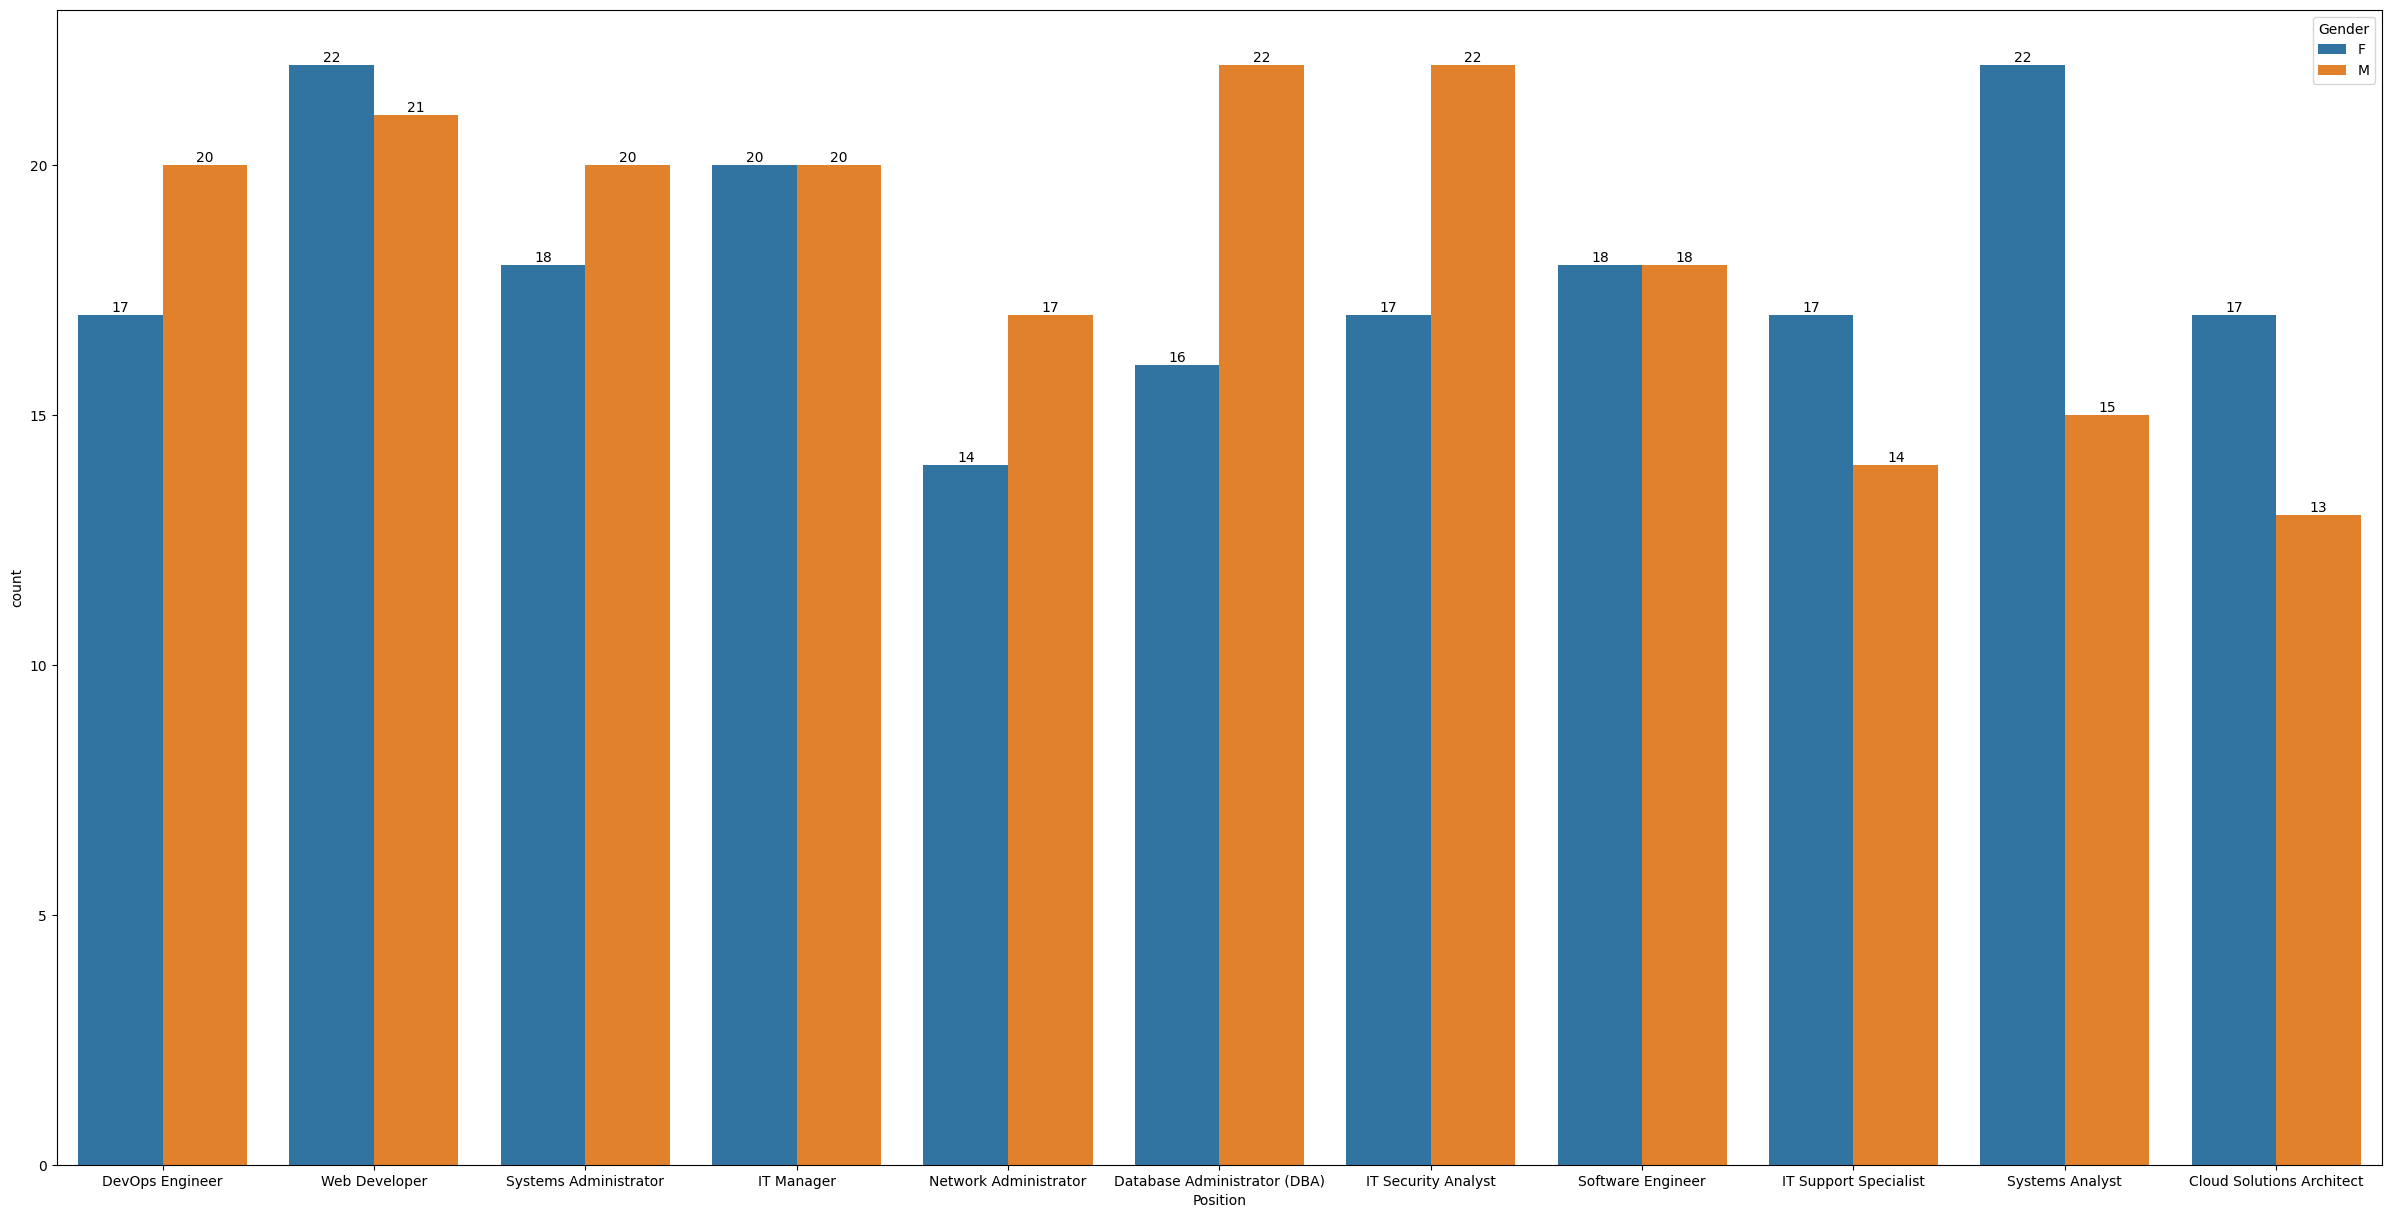

In [53]:
plt.figure(figsize=(30,15))
data = sns.countplot(x=df['Position'],hue=df['Gender'])

for i in data.containers:
    print(data.bar_label(i))

In [54]:
df['gender_cate'] = pd.Categorical(df['Gender']).codes
df['position_cate'] = pd.Categorical(df['Position']).codes

In [55]:
df.head()

,ID,Gender,experience_year,Position,Salary,gender_cate,position_cate
0,1,F,4,DevOps Engineer,109976,0,2
1,2,M,6,DevOps Engineer,120088,1,2
2,3,M,17,Web Developer,181301,1,10
3,4,M,7,Systems Administrator,77530,1,8
4,5,F,13,Systems Administrator,152397,0,8


<Axes: >

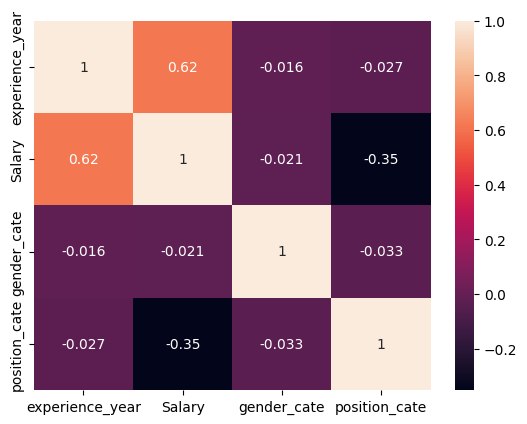

In [56]:
sns.heatmap(df[['experience_year','Salary','gender_cate','position_cate']].corr(),annot=True)

<Axes: xlabel='experience_year', ylabel='Salary'>

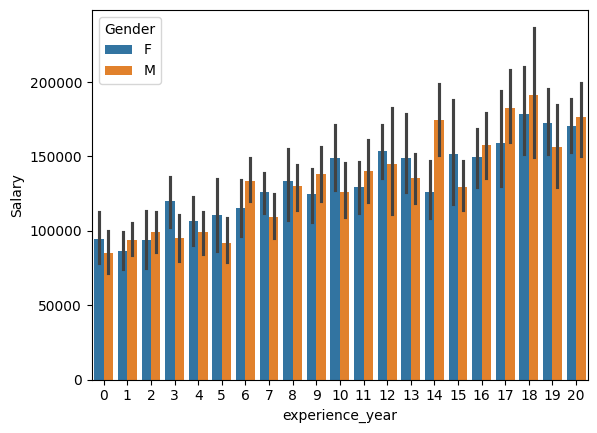

In [57]:
sns.barplot(x='experience_year',y='Salary',hue='Gender',data=df)

In [58]:
df['Salary'].value_counts()

Salary
121650    1
91542     1
105758    1
110686    1
149281    1
         ..
152397    1
77530     1
181301    1
120088    1
109976    1
Name: count, Length: 400, dtype: int64

In [59]:
df.groupby(['Gender','Position']).agg({'Salary':['mean','max','min','count','sum','median']}) # experience_year
                                

Salary                        \
                                              mean     max     min count   
Gender Position                                                            
F      Cloud Solutions Architect     158085.764706  236045  107263    17   
       Database Administrator (DBA)  135692.687500  188681   90721    16   
       DevOps Engineer               165848.764706  242819  105563    17   
       IT Manager                    164478.050000  268774  105758    20   
       IT Security Analyst           148443.529412  232972   70941    17   
       IT Support Specialist          87131.117647  136355   43643    17   
       Network Administrator         122845.142857  174498   73364    14   
       Software Engineer             124160.333333  190752   66956    18   
       Systems Administrator         117342.000000  178265   55964    18   
       Systems Analyst               127034.181818  206324   72006    22   
       Web Developer                 110309.500000  182770   59145    22   
M      Cloud Solutions Architect     164445.461538  252949   92288    13   
       Database Administrator (DBA)  130807.727273  214420   67396    22   
       DevOps Engineer               158467.850000  218258  103940    20   
       IT Manager                    176945.050000  269950   87871    20   
       IT Security Analyst           123620.545455  207529   70591    22   
       IT Support Specialist          88354.928571  130119   48710    14   
       Network Administrator         111940.294118  181654   61605    17   
       Software Engineer             138554.500000  215034   76006    18   
       Systems Administrator         109315.350000  190672   61236    20   
       Systems Analyst               128573.400000  188959   75749    15   
       Web Developer                 106068.095238  181301   57567    21   

                                                        
                                         sum    median  
Gender Position                                         
F      Cloud Solutions Architect     2687458  150681.0  
       Database Administrator (DBA)  2171083  132941.0  
       DevOps Engineer               2819429  157975.0  
       IT Manager                    3289561  157384.5  
       IT Security Analyst           2523540  150869.0  
       IT Support Specialist         1481229   88993.0  
       Network Administrator         1719832  121028.0  
       Software Engineer             2234886  114478.5  
       Systems Administrator         2112156  126527.0  
       Systems Analyst               2794752  118405.0  
       Web Developer                 2426809  107609.5  
M      Cloud Solutions Architect     2137791  161408.0  
       Database Administrator (DBA)  2877770  131083.5  
       DevOps Engineer               3169357  154000.0  
       IT Manager                    3538901  173507.0  
       IT Security Analyst           2719652  117901.0  
       IT Support Specialist         1236969   90484.5  
       Network Administrator         1902985  111362.0  
       Software Engineer             2493981  139820.5  
       Systems Administrator         2186307  108771.5  
       Systems Analyst               1928601  132950.0  
       Web Developer                 2227430  100091.0

C:\Users\DELL\AppData\Local\Temp\ipykernel_10476\3249851952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

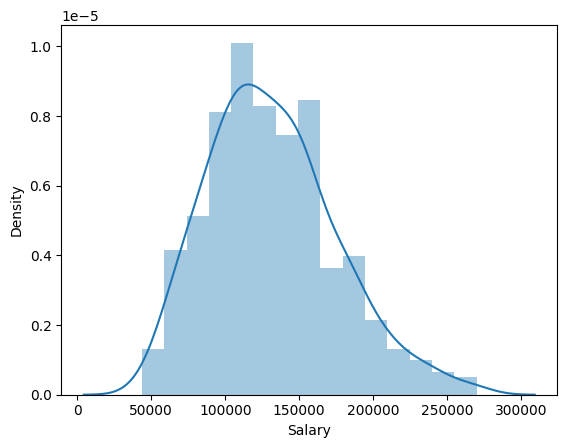

In [60]:
sns.distplot(df['Salary'])

<Axes: ylabel='Salary'>

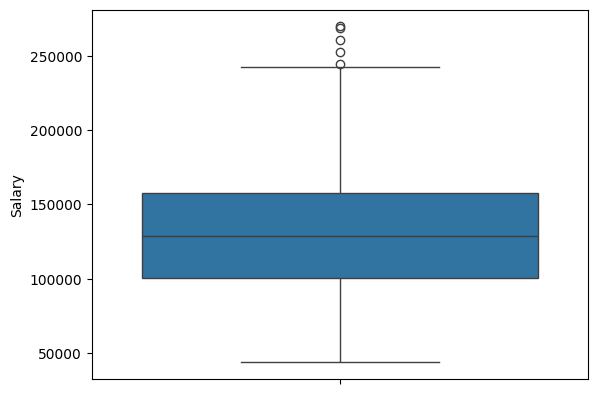

In [61]:
sns.boxplot(df['Salary'])

<Axes: ylabel='Salary'>

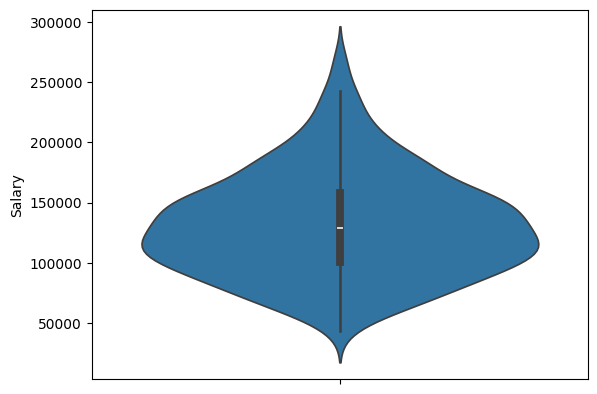

In [62]:
sns.violinplot(df['Salary'])

In [63]:
df['Salary'].size

400

In [64]:
# 1. Normal (Gaussian) Distribution
normal_data = np.random.normal(loc=0, scale=1, size=df['Salary'].size)

# 2. Uniform Distribution
uniform_data = np.random.uniform(low=-3, high=3, size=df['Salary'].size)

# 3. Skewed Distribution (Log-normal)
skewed_data = np.random.lognormal(mean=0, sigma=0.5, size=df['Salary'].size)

# 4. Bimodal Distribution (Mixture of two normals)
bimodal_data = np.concatenate([
    np.random.normal(-2, 0.5, df['Salary'].size//2),
    np.random.normal(2, 0.5, df['Salary'].size//2)
])

In [65]:
# Create a function to analyze distribution
def analyze_distribution(data, title):
    plt.figure(figsize=(15, 10))

    # 1. Histogram with KDE
    plt.subplot(2, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'{title} - Histogram with KDE')

    # 2. Box Plot
    plt.subplot(2, 2, 2)
    sns.boxplot(data=data)
    plt.title(f'{title} - Box Plot')

    # 3. Q-Q Plot
    plt.subplot(2, 2, 3)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'{title} - Q-Q Plot')

    # 4. Calculate summary statistics
    summary_stats = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Std Dev': np.std(data),
        'Skewness': stats.skew(data),
        'Kurtosis': stats.kurtosis(data)
    }

    # Add stats text to the fourth subplot
    plt.subplot(2, 2, 4)
    plt.axis('off')
    stats_text = '\n'.join([f'{k}: {v:.3f}' for k, v in summary_stats.items()])
    plt.text(0.1, 0.5, stats_text, fontsize=12)
    plt.title('Summary Statistics')

    plt.tight_layout()
    plt.show()

    # Perform normality test
    statistic, p_value = stats.normaltest(data)
    print(f"\nNormality Test (D'Agostino's K^2 Test)")
    print(f"Statistic: {statistic:.3f}")
    print(f"P-value: {p_value:.3f}")
    print("Normal: " if p_value > 0.05 else "Not Normal")



--------------------------------------------------
Analyzing Normal Distribution
--------------------------------------------------


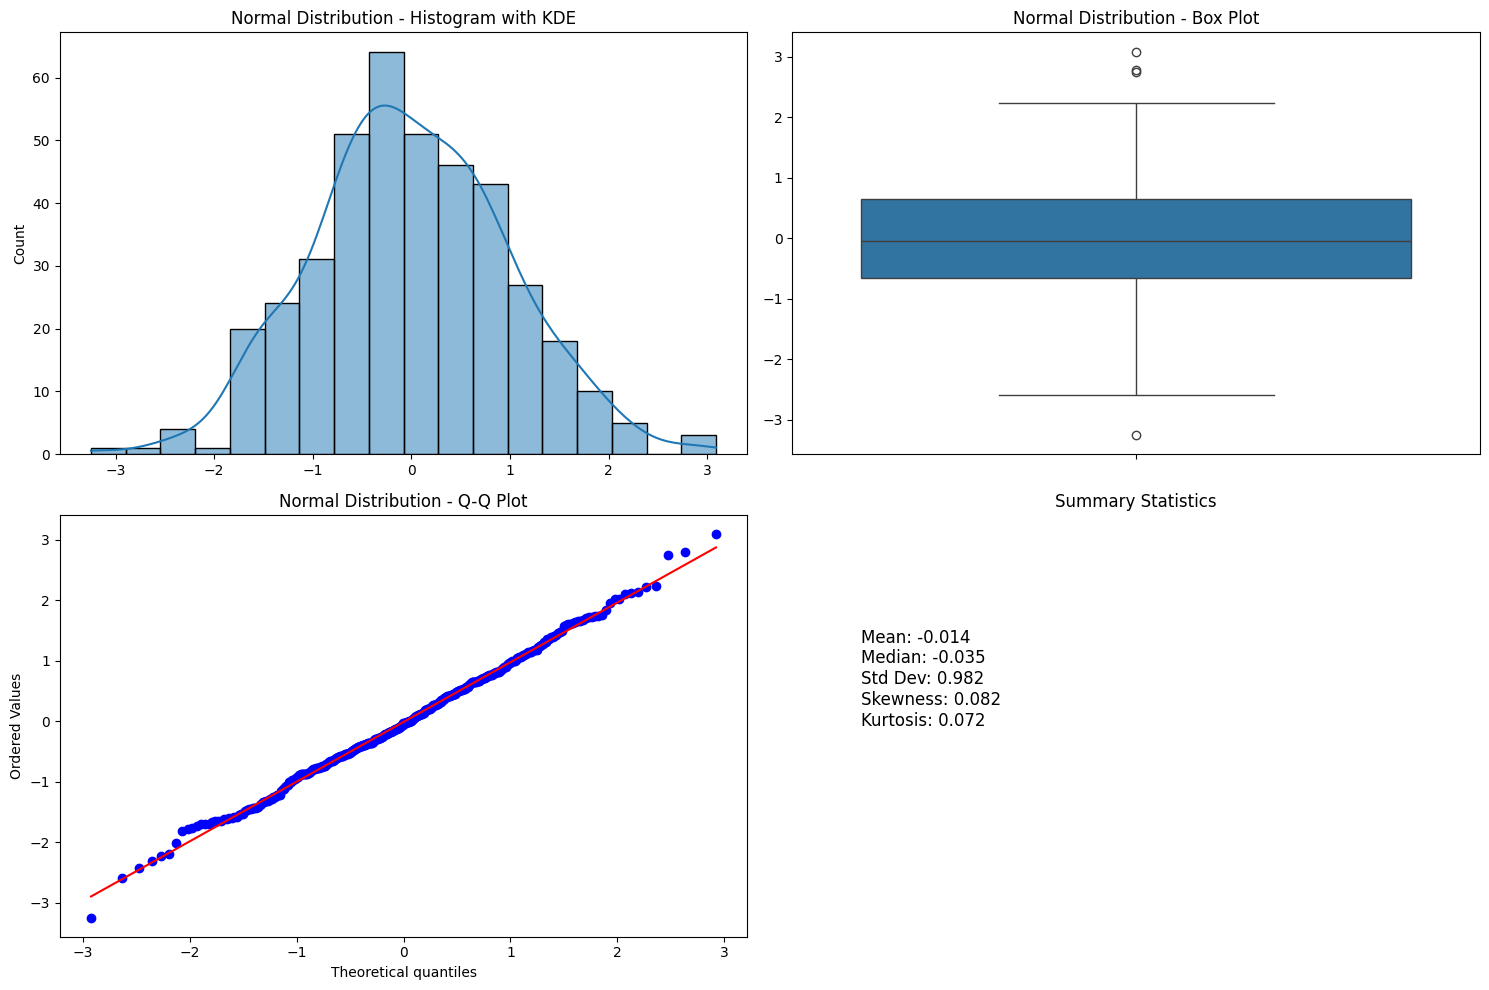


Normality Test (D'Agostino's K^2 Test)
Statistic: 0.680
P-value: 0.712
Normal: 

--------------------------------------------------
Analyzing Uniform Distribution
--------------------------------------------------


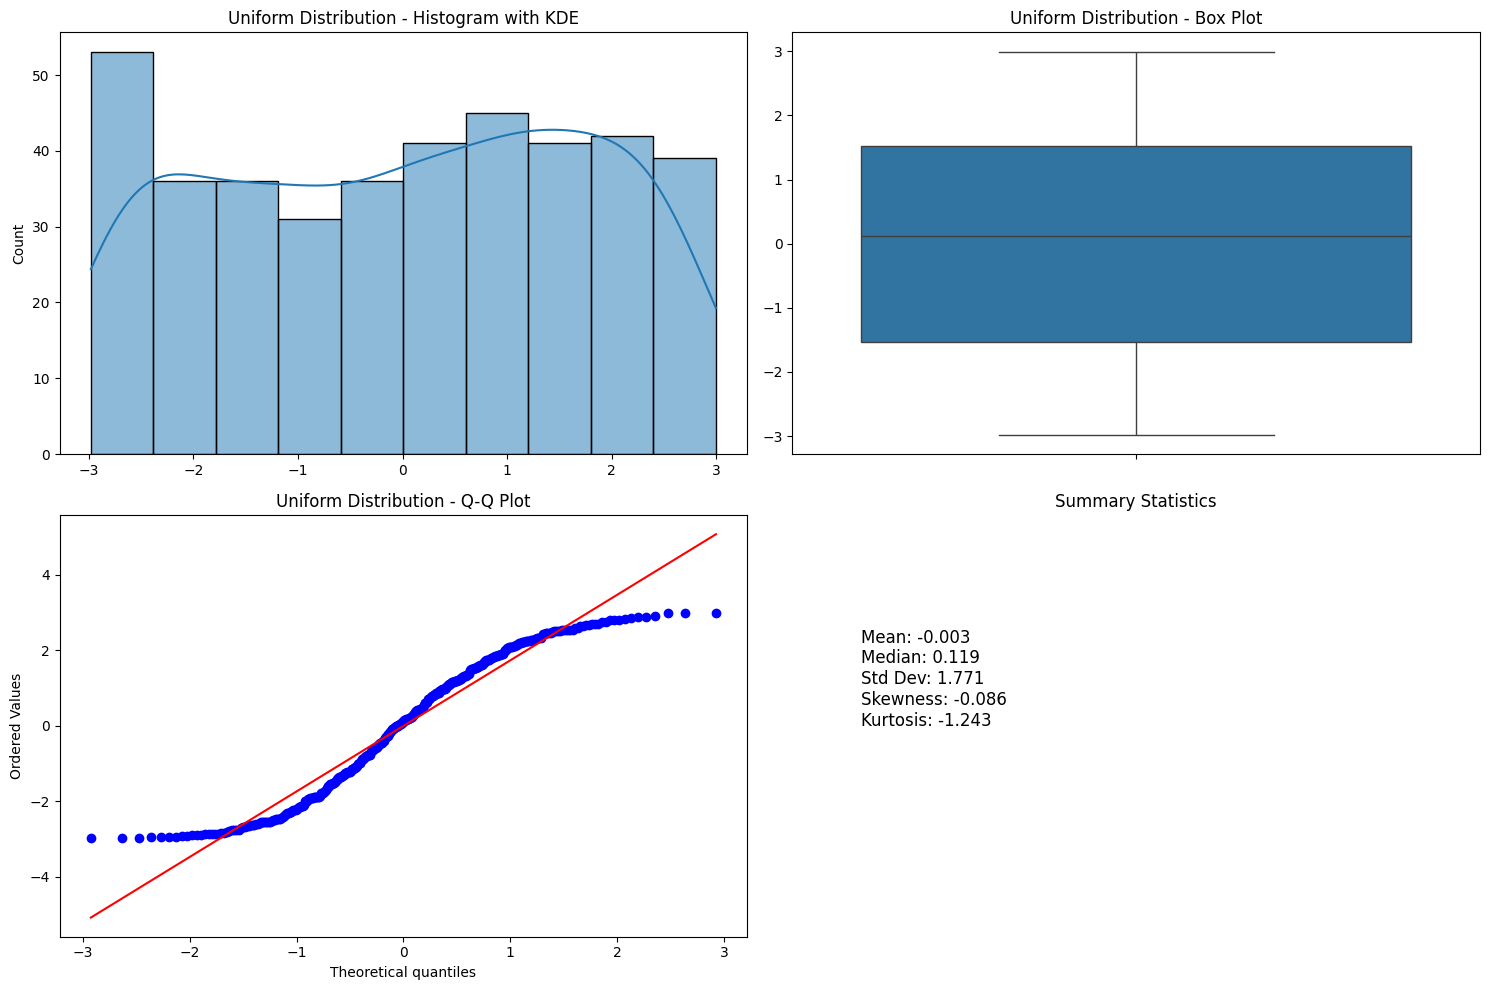


Normality Test (D'Agostino's K^2 Test)
Statistic: 326.047
P-value: 0.000
Not Normal

--------------------------------------------------
Analyzing Skewed Distribution
--------------------------------------------------


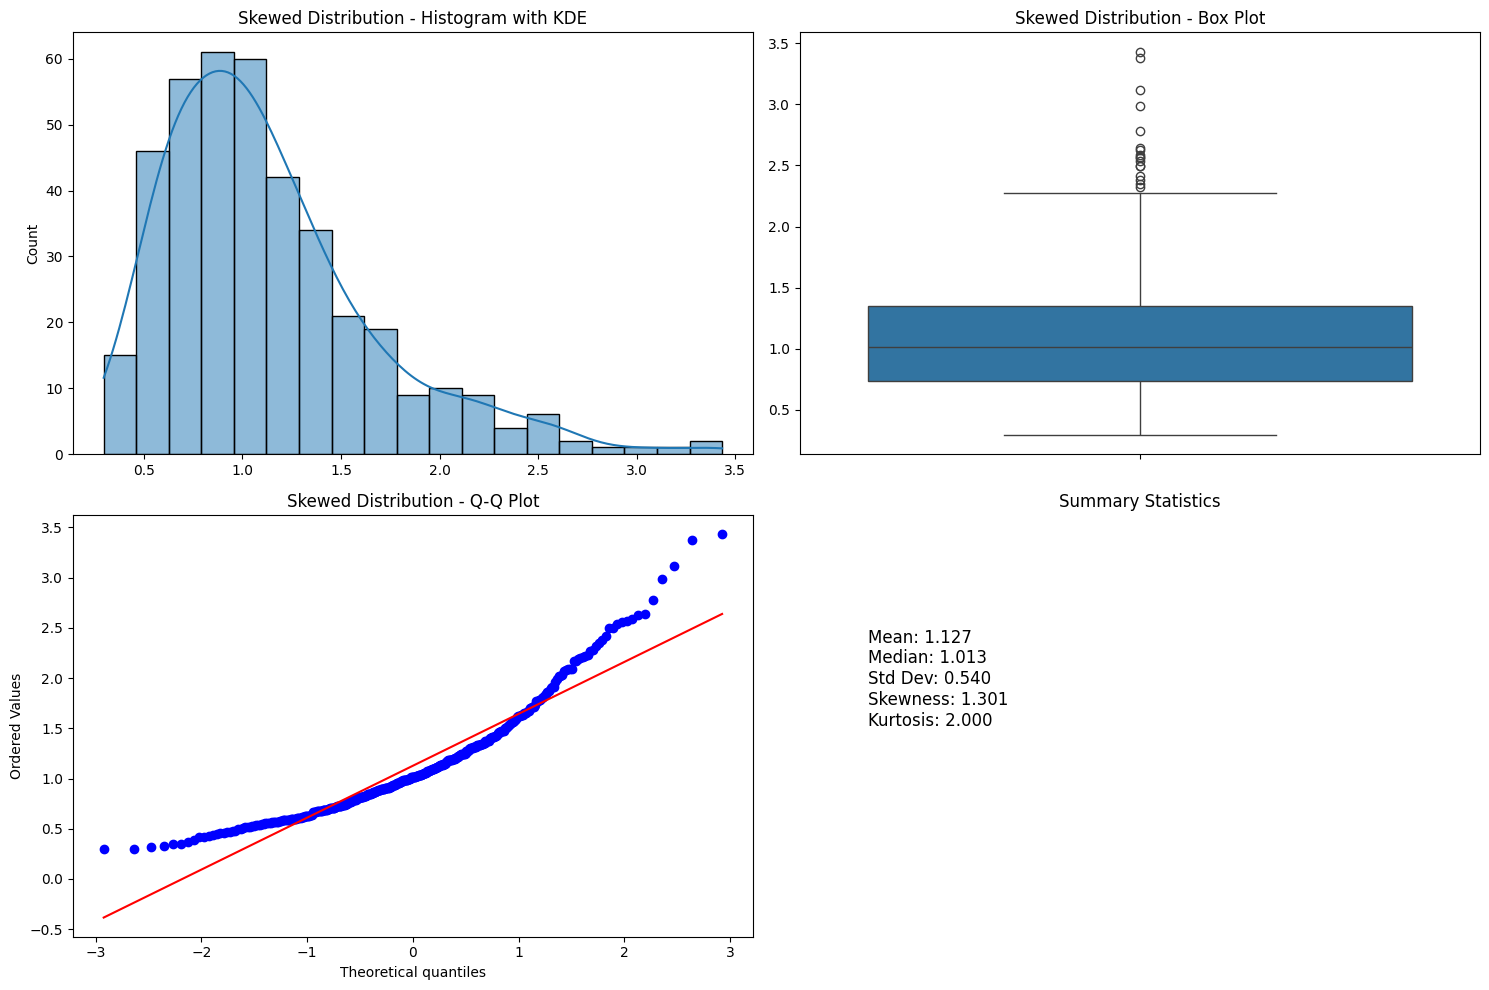


Normality Test (D'Agostino's K^2 Test)
Statistic: 94.688
P-value: 0.000
Not Normal

--------------------------------------------------
Analyzing Bimodal Distribution
--------------------------------------------------


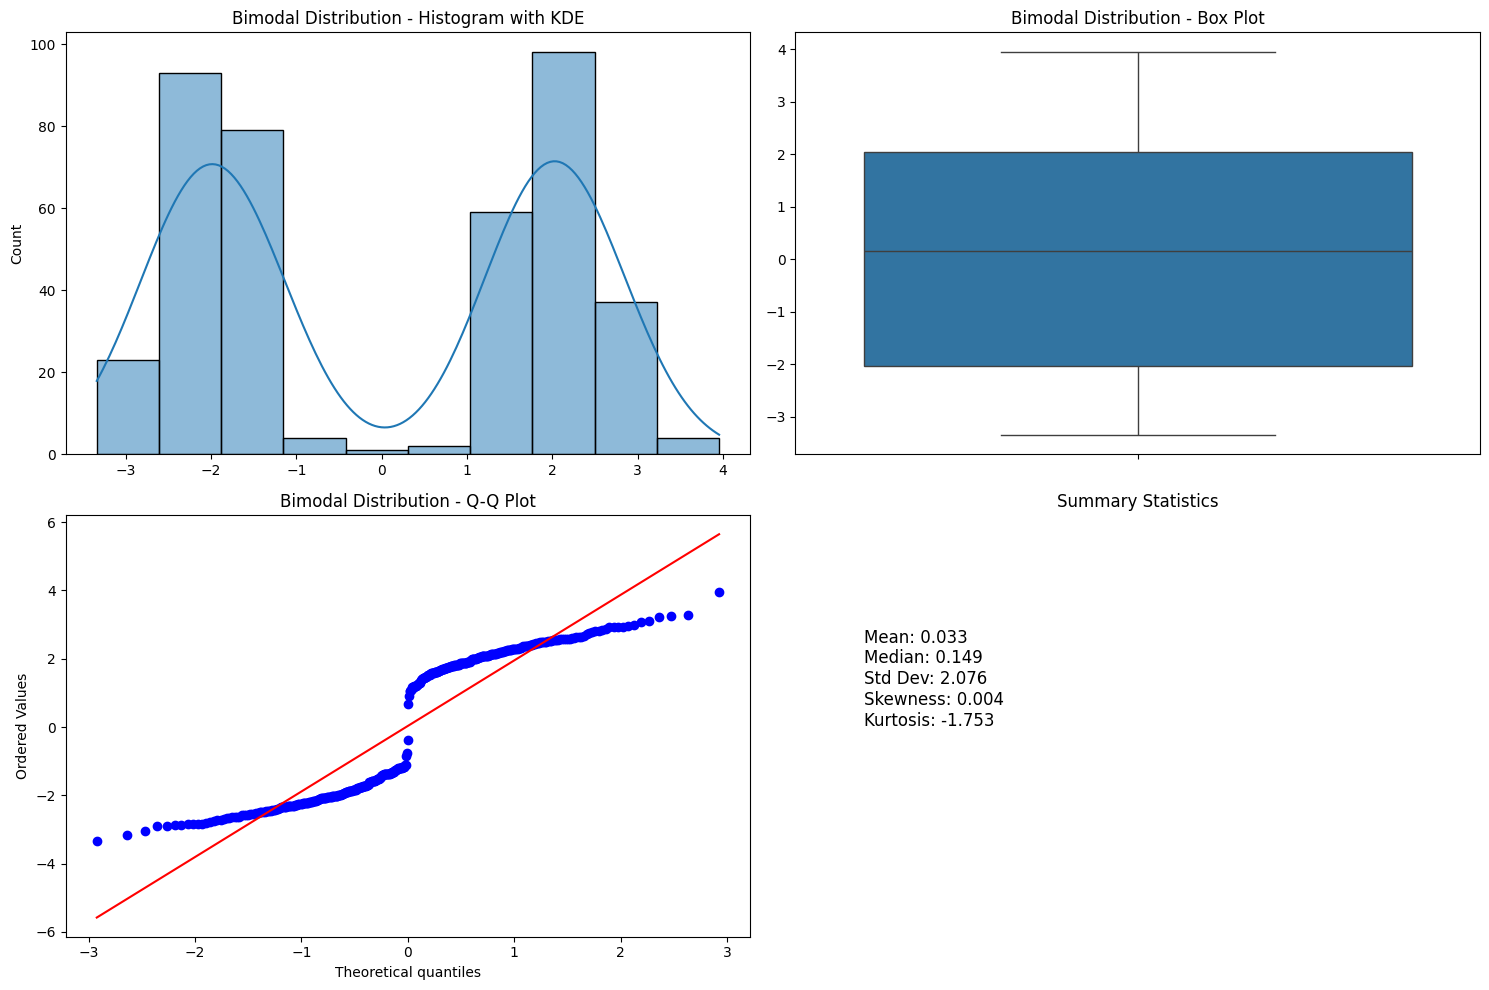


Normality Test (D'Agostino's K^2 Test)
Statistic: 2151.356
P-value: 0.000
Not Normal


In [66]:
# Analyze each distribution
distributions = {
    'Normal Distribution': normal_data,
    'Uniform Distribution': uniform_data,
    'Skewed Distribution': skewed_data,
    'Bimodal Distribution': bimodal_data
}

for name, data in distributions.items():
    print(f"\n{'-'*50}")
    print(f"Analyzing {name}")
    print(f"{'-'*50}")
    analyze_distribution(data, name)

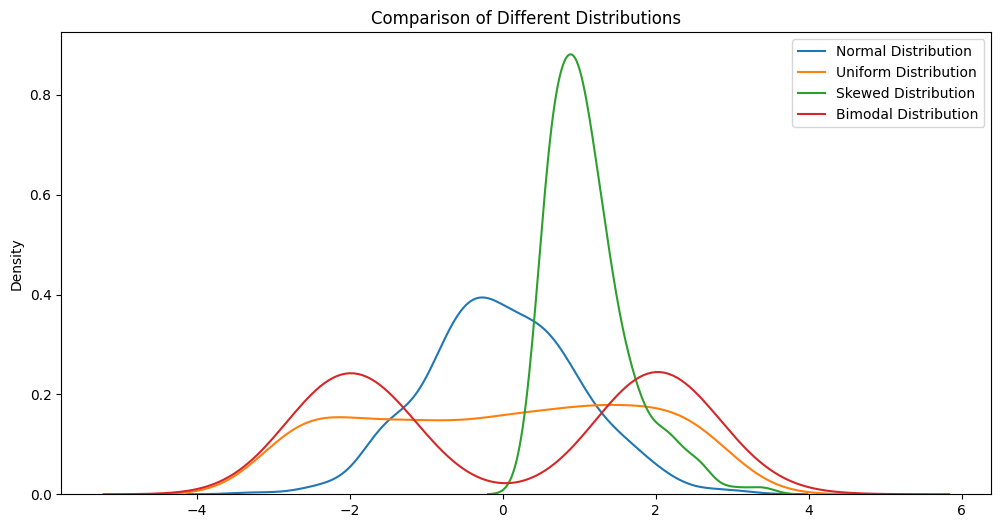

In [67]:
# Additional visualization: Compare all distributions
plt.figure(figsize=(12, 6))
for name, data in distributions.items():
    sns.kdeplot(data, label=name)
plt.title('Comparison of Different Distributions')
plt.legend()
plt.show()

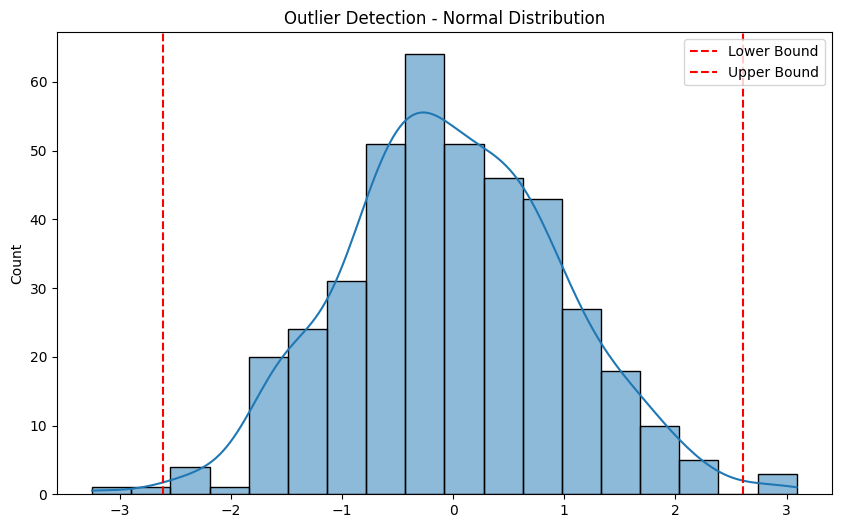


Outlier Analysis for Normal Distribution
Number of outliers: 4
Percentage of outliers: 1.00%


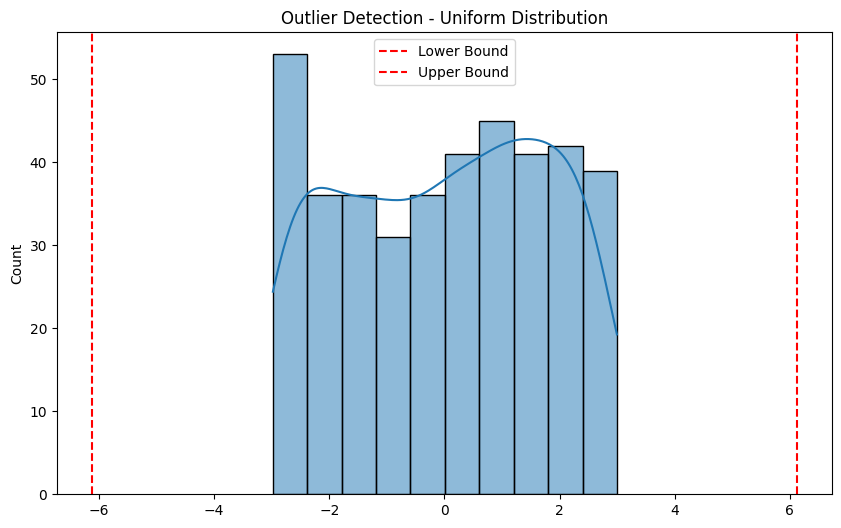


Outlier Analysis for Uniform Distribution
Number of outliers: 0
Percentage of outliers: 0.00%


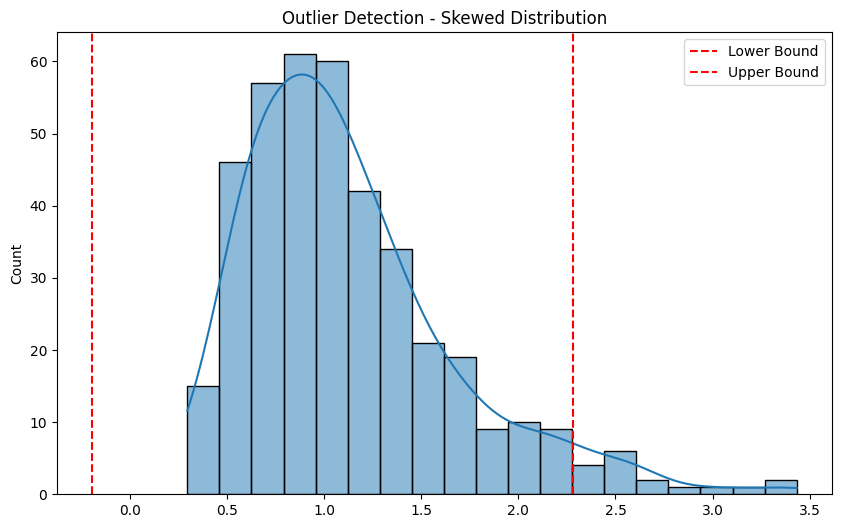


Outlier Analysis for Skewed Distribution
Number of outliers: 17
Percentage of outliers: 4.25%


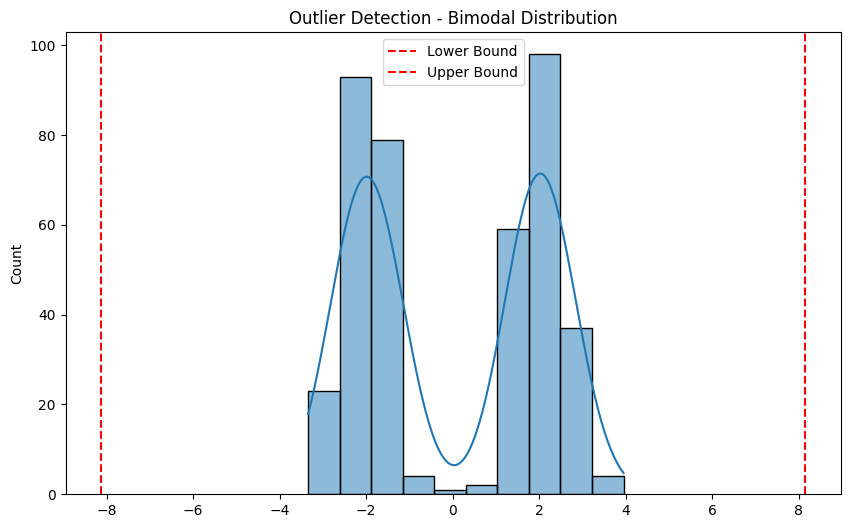


Outlier Analysis for Bimodal Distribution
Number of outliers: 0
Percentage of outliers: 0.00%


In [68]:
# Create example of how distribution affects outlier detection
def demonstrate_outlier_detection(data, title):
    plt.figure(figsize=(10, 6))

    # Calculate outlier boundaries
    Q1 = np.percentile(data, 25)   # pd['col].quantile(0.25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot distribution and outlier boundaries
    sns.histplot(data, kde=True)
    plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.title(f'Outlier Detection - {title}')
    plt.legend()
    plt.show()

    # Print outlier statistics
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"\nOutlier Analysis for {title}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(data))*100:.2f}%")

# Demonstrate outlier detection for each distribution
for name, data in distributions.items():
    demonstrate_outlier_detection(data, name)

Normality Tests (Employees Salary):

Distribution Similarity Tests (Kolmogorov-Smirnov):


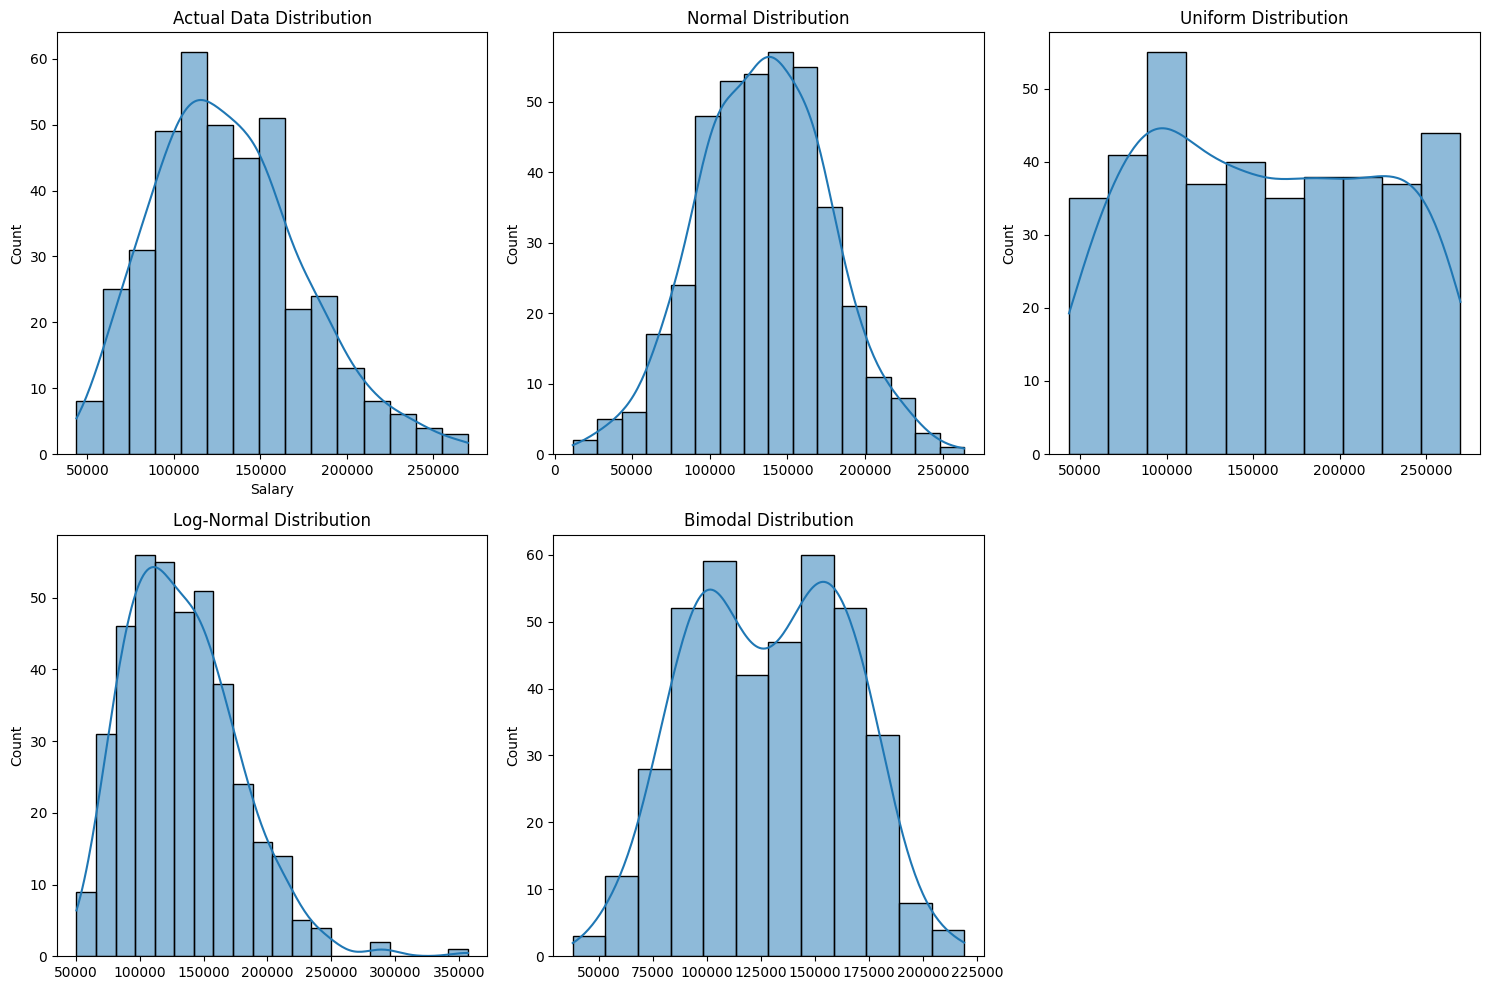


Descriptive Statistics:

Shapiro-Wilk Test Results:
Normal: statistic=0.9986, p-value=0.9901
Uniform: statistic=0.9511, p-value=0.0000
Log-Normal: statistic=0.9601, p-value=0.0000
Bimodal: statistic=0.9824, p-value=0.0001

Kolmogorov-Smirnov Test Results:
Normal: statistic=0.0875, p-value=0.0935
Uniform: statistic=0.2675, p-value=0.0000
Log-Normal: statistic=0.0375, p-value=0.9416
Bimodal: statistic=0.0800, p-value=0.1546

Descriptive Statistics Comparison:

actual:
  mean: 131701.1975
  median: 128561.5000
  std: 43297.2857
  skewness: 0.5463
  kurtosis: 0.0927

Normal:
  mean: 134461.7047
  median: 134956.8101
  std: 41560.0620
  skewness: 0.0186
  kurtosis: -0.0312

Uniform:
  mean: 155483.2368
  median: 150622.6101
  std: 65680.6832
  skewness: 0.0645
  kurtosis: -1.2256

Log-Normal:
  mean: 133195.2431
  median: 127714.1528
  std: 43445.9216
  skewness: 0.8608
  kurtosis: 1.5803

Bimodal:
  mean: 128763.3904
  median: 129048.3298
  std: 35894.3019
  skewness: -0.0212
  kurtosis: 

In [69]:
def analyze_distribution_fit(actual_data, distributions):
    """
    Analyze how well different simulated distributions match actual data
    
    Parameters:
    - actual_data: Numpy array or pandas Series of actual data
    - distributions: Dictionary of distribution arrays
    
    Returns:
    - Statistical test results and visualization
    """
    # Statistical Test Results
    results = {}
    
    # Shapiro-Wilk Test for Normality
    print("Normality Tests (Employees Salary):")
    results['shapiro'] = {
        'actual': stats.shapiro(actual_data),
        'distributions': {
            name: stats.shapiro(dist) 
            for name, dist in distributions.items()
        }
    }
    
    # Kolmogorov-Smirnov Test for Distribution Similarity
    print("\nDistribution Similarity Tests (Kolmogorov-Smirnov):")
    results['ks_test'] = {
        name: stats.ks_2samp(actual_data, dist)
        for name, dist in distributions.items()
    }
    
    # Visual Comparison
    plt.figure(figsize=(15, 10))
    
    # Actual Data Distribution
    plt.subplot(2, 3, 1)
    sns.histplot(actual_data, kde=True)
    plt.title('Actual Data Distribution')
    
    # Simulated Distributions
    for i, (name, dist) in enumerate(distributions.items(), start=2):
        plt.subplot(2, 3, i)
        sns.histplot(dist, kde=True)
        plt.title(f'{name} Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Descriptive Statistics Comparison
    print("\nDescriptive Statistics:")
    desc_stats = {
        'actual': {
            'mean': np.mean(actual_data),
            'median': np.median(actual_data),
            'std': np.std(actual_data),
            'skewness': stats.skew(actual_data),
            'kurtosis': stats.kurtosis(actual_data)
        }
    }
    
    for name, dist in distributions.items():
        desc_stats[name] = {
            'mean': np.mean(dist),
            'median': np.median(dist),
            'std': np.std(dist),
            'skewness': stats.skew(dist),
            'kurtosis': stats.kurtosis(dist)
        }
    
    # Print Results
    print("\nShapiro-Wilk Test Results:")
    for name, test_result in results['shapiro']['distributions'].items():
        print(f"{name}: statistic={test_result.statistic:.4f}, p-value={test_result.pvalue:.4f}")
    
    print("\nKolmogorov-Smirnov Test Results:")
    for name, test_result in results['ks_test'].items():
        print(f"{name}: statistic={test_result.statistic:.4f}, p-value={test_result.pvalue:.4f}")
    
    print("\nDescriptive Statistics Comparison:")
    for name, stats_dict in desc_stats.items():
        print(f"\n{name}:")
        for stat_name, value in stats_dict.items():
            print(f"  {stat_name}: {value:.4f}")
    
    return results, desc_stats

# Assuming 'df' is your DataFrame with 'Salary' column
actual_salary = df['Salary'].values

# Create distributions
distributions = {
    'Normal': np.random.normal(loc=np.mean(actual_salary), 
                                scale=np.std(actual_salary), 
                                size=len(actual_salary)),
    'Uniform': np.random.uniform(low=np.min(actual_salary), 
                                  high=np.max(actual_salary), 
                                  size=len(actual_salary)),
    'Log-Normal': np.random.lognormal(mean=np.mean(np.log(actual_salary)), 
                                       sigma=np.std(np.log(actual_salary)), 
                                       size=len(actual_salary)),
    'Bimodal': np.concatenate([
        np.random.normal(np.percentile(actual_salary, 25), 
                         np.std(actual_salary)/2, 
                         len(actual_salary)//2),
        np.random.normal(np.percentile(actual_salary, 75), 
                         np.std(actual_salary)/2, 
                         len(actual_salary)//2)
    ])
}

# Run Distribution Analysis
results, desc_stats = analyze_distribution_fit(df['Salary'], distributions)

In [70]:
def calculate_bounds(data, method='iqr', z_score=3, confidence=0.95):
    """
    Calculate upper and lower bounds using different methods

    Parameters:
    data: array-like
    method: str, 'iqr' or 'zscore' or 'confidence'
    z_score: int, number of standard deviations for z-score method
    confidence: float, confidence level for confidence interval
    """

    # 1. IQR Method (Box Plot Method)
    if method == 'iqr':
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        formula = """
        IQR Method Formula:
        IQR = Q3 - Q1
        Lower Bound = Q1 - 1.5 × IQR
        Upper Bound = Q3 + 1.5 × IQR
        """

    # 2. Z-Score Method
    elif method == 'zscore':
        mean = np.mean(data)
        std = np.std(data)
        # z_score = x-mean/std
        lower_bound = mean - z_score * std
        upper_bound = mean + z_score * std
        formula = f"""
        Z-Score Method Formula:
        Lower Bound = Mean - {z_score} × Standard Deviation
        Upper Bound = Mean + {z_score} × Standard Deviation
        """

    # 3. Confidence Interval Method
    elif method == 'confidence':
        mean = np.mean(data)
        std_error = stats.sem(data)
        ci = stats.t.interval(confidence, len(data)-1, mean, std_error)
        lower_bound = ci[0]
        upper_bound = ci[1]
        formula = f"""
        Confidence Interval Formula:
        CI = Mean ± t(α/2, n-1) × Standard Error
        where t is the t-value for {confidence*100}% confidence level
        """

    return lower_bound, upper_bound, formula


IQR Method:

        IQR Method Formula:
        IQR = Q3 - Q1
        Lower Bound = Q1 - 1.5 × IQR
        Upper Bound = Q3 + 1.5 × IQR
        
Lower Bound: 14609.38
Upper Bound: 243610.38
Percentage of data within bounds: 0.00%

ZSCORE Method:

        Z-Score Method Formula:
        Lower Bound = Mean - 3 × Standard Deviation
        Upper Bound = Mean + 3 × Standard Deviation
        
Lower Bound: 1809.34
Upper Bound: 261593.05
Percentage of data within bounds: 0.00%

CONFIDENCE Method:

        Confidence Interval Formula:
        CI = Mean ± t(α/2, n-1) × Standard Error
        where t is the t-value for 95.0% confidence level
        
Lower Bound: 127439.90
Upper Bound: 135962.49
Percentage of data within bounds: 0.00%


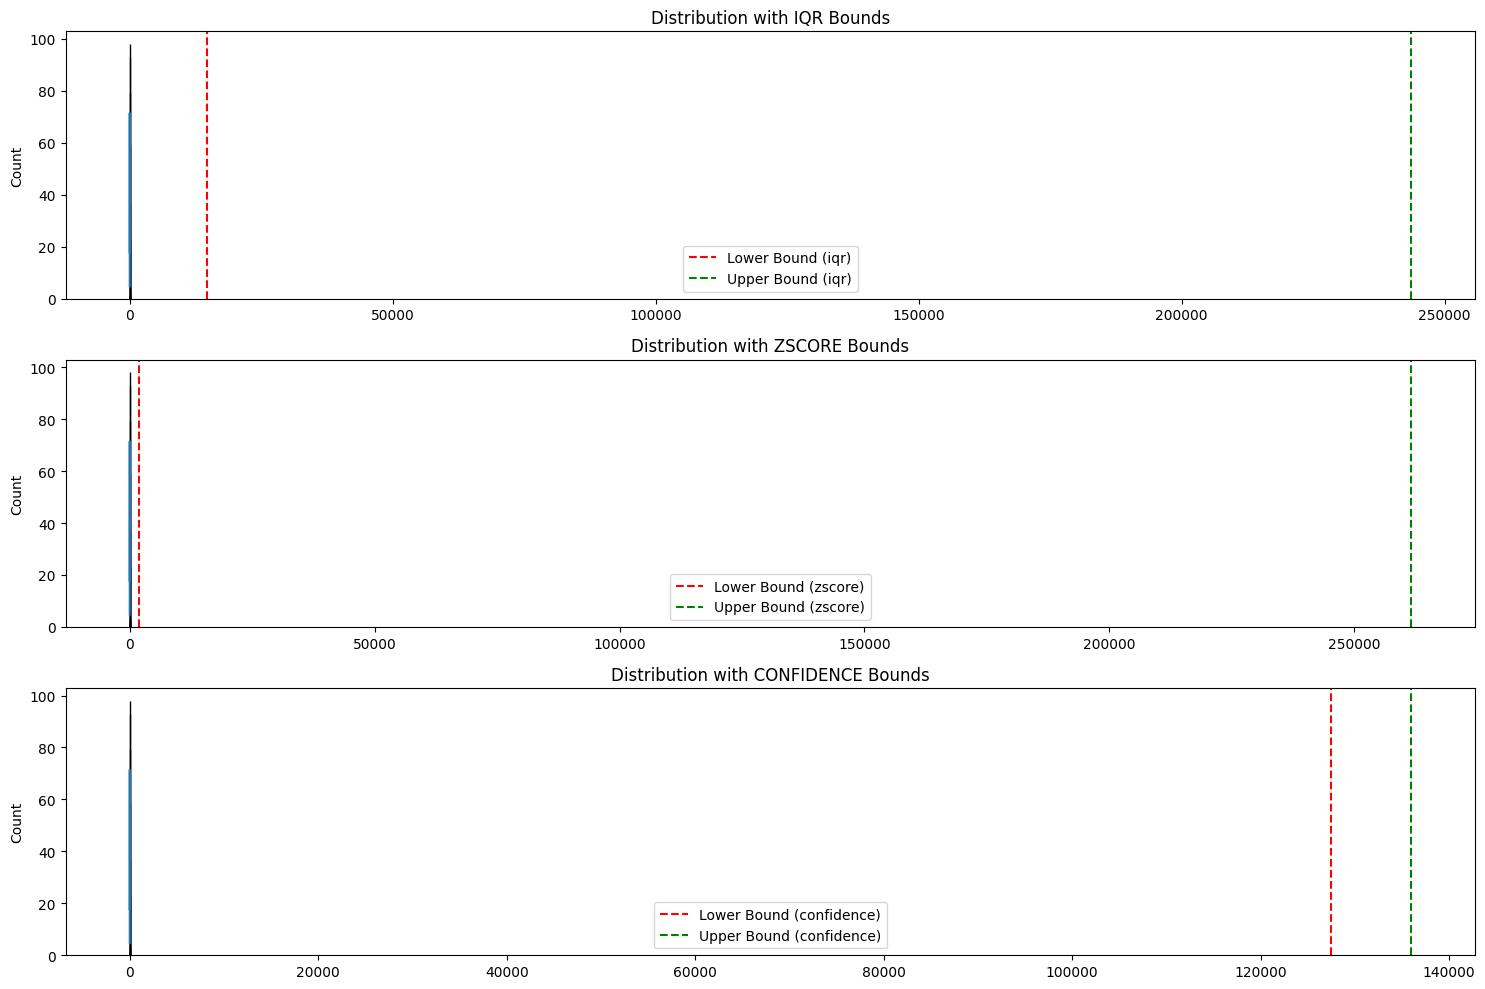

In [71]:
# Demonstrate all methods
methods = ['iqr', 'zscore', 'confidence']
plt.figure(figsize=(15, 10))

for i, method in enumerate(methods, 1):
    lower, upper, formula = calculate_bounds(df['Salary'], method=method)

    plt.subplot(3, 1, i)
    sns.histplot(data, kde=True)
    plt.axvline(lower, color='r', linestyle='--', label=f'Lower Bound ({method})')
    plt.axvline(upper, color='g', linestyle='--', label=f'Upper Bound ({method})')
    plt.title(f'Distribution with {method.upper()} Bounds')
    plt.legend()

    print(f"\n{method.upper()} Method:")
    print(formula)
    print(f"Lower Bound: {lower:.2f}")
    print(f"Upper Bound: {upper:.2f}")

    # Calculate and print percentage of data within bounds
    within_bounds = np.sum((data >= lower) & (data <= upper))
    percentage = (within_bounds / len(data)) * 100
    print(f"Percentage of data within bounds: {percentage:.2f}%")


plt.tight_layout()

In [72]:
df.columns

Index(['ID', 'Gender', 'experience_year', 'Position', 'Salary', 'gender_cate',
       'position_cate'],
      dtype='object')

In [144]:
df.head()

,ID,Gender,experience_year,Position,Salary,gender_cate,position_cate
0,1,F,4,DevOps Engineer,109976,0,2
1,2,M,6,DevOps Engineer,120088,1,2
2,3,M,17,Web Developer,181301,1,10
3,4,M,7,Systems Administrator,77530,1,8
4,5,F,13,Systems Administrator,152397,0,8


In [142]:
new_df = df.copy()

In [143]:
new_df.drop(columns=['ID','Gender','Position'],inplace=True)

In [145]:
new_df.head()

,experience_year,Salary,gender_cate,position_cate
0,4,109976,0,2
1,6,120088,1,2
2,17,181301,1,10
3,7,77530,1,8
4,13,152397,0,8


In [183]:
#X = df[['gender_cate','experience_year','position_cate']]
#X = df.iloc[:,[5,2,6]]
X = new_df.iloc[:,[0,2,3]]
X

,experience_year,gender_cate,position_cate
0,4,0,2
1,6,1,2
2,17,1,10
3,7,1,8
4,13,0,8
...,...,...,...
395,19,0,0
396,20,0,10
397,9,0,6
398,18,1,1


In [184]:
y = new_df[['Salary']]
y

,Salary
0,109976
1,120088
2,181301
3,77530
4,152397
...,...
395,236045
396,182770
397,85550
398,129996


In [185]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,accuracy_score,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import *
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import sys
import scipy
import matplotlib
import sklearn

In [186]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
Scipy: 1.14.1
Numpy: 2.1.2
Pandas: 2.2.3
Matplotlib: 3.9.2
Seaborn: 0.13.2
Sklearn: 1.5.2


In [187]:
from sklearn.ensemble import RandomForestClassifier
#(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [204]:
models=[]
#models.append(('LinearRegression:',LinearRegression()))
models.append(('LR:',LogisticRegression(solver='liblinear',multi_class='ovr')))
#models.append(('LDA:',LinearDiscriminantAnalysis()))
models.append(('KNN:',KNeighborsClassifier()))
models.append(('DTC(CART:)',DecisionTreeClassifier()))
models.append(('RFC: ',RandomForestClassifier(n_estimators=100)))
models.append(('NB:',GaussianNB()))
models.append(('SVC',SVC(gamma='auto')))

In [205]:
seed = 6 # 6
scoring = 'accuracy'

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=seed) # stratify=None

In [207]:
# from sklearn.datasets import make_classification

# # Generate a small dataset with 2 samples and 3 classes (problematic)
# X, y = make_classification(n_samples=2, n_classes=3, n_features=4, random_state=42)

# # Attempting train_test_split with stratify (this will raise the error)
# try:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# except ValueError as e:
#     print(e)  # Output: ValueError: The number of samples must be more than the number of classes

In [208]:
X_train.size,X_test.size

(960, 240)

In [209]:
y_train.size,y_test.size

(320, 80)

In [210]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits = 5, random_state = seed,shuffle=True)
    # n_splits = min(10, len(X_train))
    # kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
    
    cv_results = cross_val_score(model,X_train,y_train,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\line

LR: : 0.000000 (0.000000)
KNN: : 0.000000 (0.000000)
DTC(CART:) : 0.000000 (0.000000)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

RFC:  : 0.000000 (0.000000)
NB: : 0.000000 (0.000000)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConve

SVC : 0.000000 (0.000000)


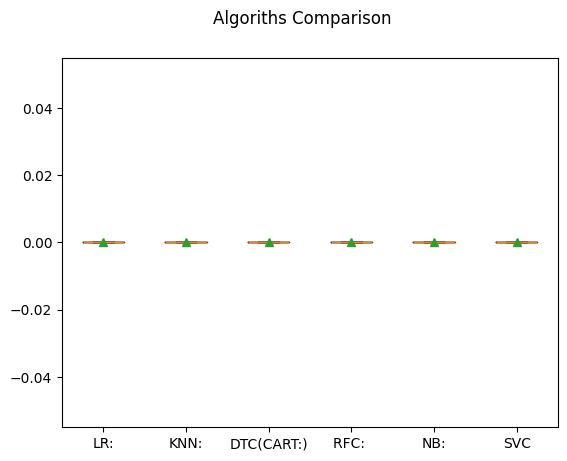

In [195]:
# comparing Algorithms and select the best model 
fig = plt.figure()
fig.suptitle('Algoriths Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

In [211]:
model = LogisticRegression()

In [212]:
model.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
y_pred = model.predict(X_test)

In [216]:
accuracy_score(y_test,y_pred)

0.0